# Assignment II: Data Structures and Methods for HPC
## Exercise 1 - PyTest with the Julia Set Code

### Task 1.1 Implement a separate code to test the assertion above using the pytest framework.
### Task 1.2 How would you implement the unit test with the possibility of having a different number of iterations and grid points? Implementation is optional.
I use ```@pytest.mark.parametrize``` to having a different number of iterations and grid points. The following is the code. If you want more desired witdh and iterations to test, please add the values folling the ```[(1000000,300,33219980)]```
```
import pytest
import JuliaSet

@pytest.mark.parametrize('desired_width, max_iterations, expected',[(1000000,300,33219980)])
def test_JuliaSet(desired_width, max_iterations, expected):
    output = JuliaSet.calc_pure_python(desired_width, max_iterations) 
    assert sum(output) == expected
```

In [ ]:
!python -m pytest test_JuliaSet.py

## Exercise 2 - Python DGEMM Benchmark Operation 
### Task 2.1 Implement the DGEMM with matrices as NumPy array

In [1]:
# implement using NumPy array
import numpy as np
def DGEMM_numpy(res,A,B):
    for i in range(np.shape(A)[0]):
        for j in range(np.shape(B)[1]):
            for k in range(np.shape(A)[1]):
                res[i][j] += A[i][k] * B[k][j] 
    return res

def DGEMM_numpylib(res,A,B):
    res = np.matmul(A,B) + res
    return res


### Task 2.2 Using pytest develop a unit test for checking the correctness of your implementations. You can find the tutorial for pytest
```
@pytest.mark.parametrize('C, A, B, expected',[(np.zeros((100, 100)),np.ones((100, 100)),np.ones((100, 100)),1000000.0)])
def test_DGEMM_numpy(C,A, B,expected):
    DGEMM_numpy(C,A,B)
    assert np.sum(C) == expected
```

In [39]:
!python -m pytest test_DGEMM.py


============================= test session starts ==============================
platform darwin -- Python 3.9.12, pytest-8.3.4, pluggy-1.5.0
rootdir: /Users/ruimins/Downloads/FDD2356/Ass2
collected 1 item                                                               

test_DGEMM.py .                                                          [100%]

============================== 1 passed in 0.47s ===============================


### Task 2.3 Measure the execution time for each approach varying the matrix size. Report the average and error (std. deviation, min/max, or interval of confidence). Answer the question: how does the computational performance, e.g., the std, vary with increasing the size of the matrices, and why so?

I tested the size: 100,150,200,250,300 and use std. deviation as errors with 5 iterations. The average execution time are exponential growth. The standard deviation slightly increases as n increases, which is the result of a certain fluctuation in the time of memory allocation when n is larger.

In [32]:
#N=[100,600,1100,1600,2100,2600,3100]
N=[100,200,300,400,500]
iteration=5
from timeit import default_timer as timer
import statistics

In [33]:
# numpy array
time_numpy_mean=[]
time_numpy_stdev=[]

for n in N:
    A = np.ones((n,n))
    B = np.ones((n,n))
    C = np.ones((n,n))
    tmp=[]
    for _ in range(iteration):
        start=timer()
        res=DGEMM_numpy(C, A, B)
        end=timer()
        tmp.append(end-start)
        
    time_numpy_mean.append(statistics.mean(tmp))
    time_numpy_stdev.append(statistics.stdev(tmp))


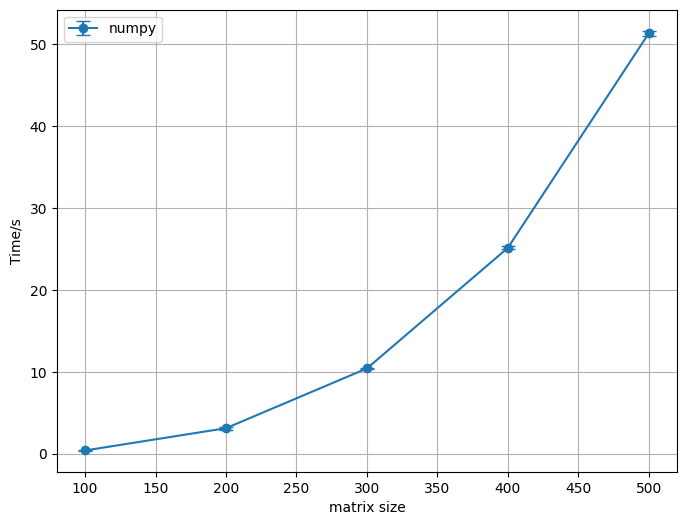

In [34]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(8, 6))
plt.errorbar(N, time_numpy_mean, yerr=time_numpy_stdev, fmt='-o', label="numpy", capsize=5)

# Labels and title
plt.xlabel("matrix size")
plt.ylabel("Time/s")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

### Task 2.4 Using the timing information and the number of operations for the DGEMM, calculate the FLOPS/s. How many operations are carried out in DGEMM with N as the matrices dimension? Hint: Think about the number of iterations completed in the loops and the number of flops per iteration. How do the FLOPS/s you measured compare to the theoretical peak of your processor (if we assume that we do one operation per cycle, then the peak is the clock frequency value)

DGEMM has N\*N\*N \* and N\*N\*N +. So the total float-point operation is 2\*N\*N\*N. The equation to caculate flops is 
$flops=\frac{2*N*N*N}{execution\_time}$. My laptop uses M1 archtecture with 4 1371 MHz E-cores and 4 3132 MHz P-cores. So the peak performance of my laptop is 3.1 Gflops per core. The FLOPS/s I measured is far less than the theoretical peak of processor due to the limitation of memory allocation and access.

In [35]:
flops_numpy=[2*n*n*n/t/1e9 for n,t in zip(N,time_numpy_mean)] 
print(flops_numpy)

[0.005040465171949634, 0.0051341654226417606, 0.00518713368446554, 0.005092881727240485, 0.0048708733543683285]


### Task 2.5 Compare the performance results with the numpy matmul operation (that uses a BLAS library). 
BLAS is faster than our implemnetation. The flops comparison are showing in the follwing figure. The main reason is that BLAS library uses multi-threading and vectorization, and it also optimize the data layout.

In [36]:
# numpy array
time_numpylib_mean=[]
time_numpylib_stdev=[]

for n in N:
    A = np.ones((n,n))
    B = np.ones((n,n))
    C = np.ones((n,n))
    tmp=[]
    for _ in range(iteration):
        start=timer()
        res=DGEMM_numpylib(C, A, B)
        end=timer()
        tmp.append(end-start)
        
    time_numpylib_mean.append(statistics.mean(tmp))
    time_numpylib_stdev.append(statistics.stdev(tmp))

flops_numpylib=[2*n*n*n/t/1e9 for n,t in zip(N,time_numpylib_mean)] 

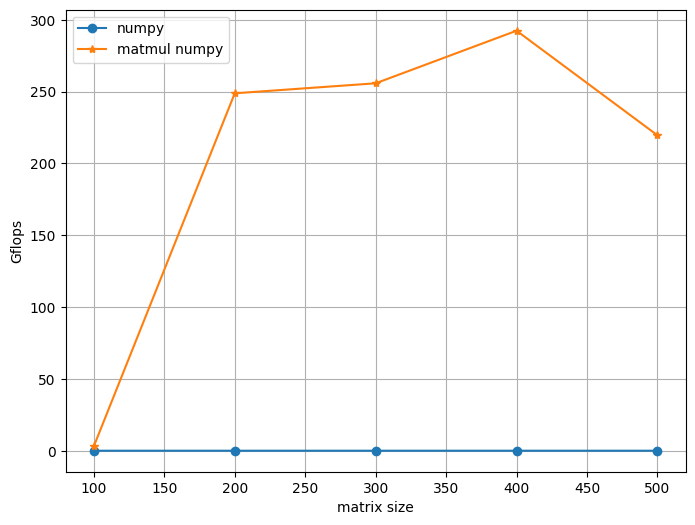

In [37]:
# Plot
plt.figure(figsize=(8, 6))
plt.errorbar(N, flops_numpy, fmt='-o', label="numpy", capsize=5)
plt.errorbar(N, flops_numpylib, fmt='-*', label="matmul numpy", capsize=5)
# Labels and title
plt.xlabel("matrix size")
plt.ylabel("Gflops")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

## Exercise 3 - Experiment with the Python Debugger
### Task 3.1 Reflection: answer the questions: What are the advantages of using a debugger? What challenges did you find in using the pdb debugger, if any?

Advantages: According to the tutorial, when using a debugger we can trace the runtime of the code and follow the logic of programm execution. Debuggers can sppedup the debugging process by providing print() function, breakpoint and so on.

Challenges: I have used the gdb debugger tool for C/C++, which has similar syntax and commands to pdb; my main challenge is that I don't know how to debug multithreaded code when using pdb, and this tutorial lacks an explanation of multithreading.